In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
from scipy.integrate import quad
import pandas as pd

#      Задача 7.1. Найти приближенное решение задачи Коши из таблицы  с заданной точностью

1.Найти решение задачи Коши  с фиксированным шагом  h=0.01 методом Эйлера и методом индивидуального варианта 

$$ f(t_i, y_i) = -25y + 15\cos{0.5t} - 12\sin{t} $$
$$ t_0 = 0; T = 1.5; y_0 = 3 $$

In [3]:
#константы
h = 0.01
t0 = 0
t1 = 1.5
y0 = 3

In [4]:
#определим функцию с правой стороны от = 
def fRight(t, y):
    return -25*y + 15*np.cos(0.5*t) - 12*np.sin(t)

#Вспомогательная функция для подсчёта значений на каждом шаге
def funcH(y, h, t):
    return(y + h * fRight(t, y))

#Метод Эйлера с заданым шагом
def Euler (y0, h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = funcH(y[i-1], h, t0 + h*(i-1))
    return y

Формула индивидуального варианта: Метод Рунге-Кутты 3-го порядка (вариант I)

$$ y_{i+1} = y_i + \frac{h}{6} (K_1 + 4K_2 + K_3), $$ где 
$$ K_1 = f(t_i, y_i) $$
$$ K_2 = f(t_i + \frac{h}{2}, y_i + \frac{hK_1}{2}) $$
$$ K_3 = f(t_i + h, y_i - hK_1 + 2hK_2) $$

In [5]:
def K1(t, y):
    return fRight(t, y)

def K2(t, y, h, K1):
    return fRight(t + h/2, y + (h * K1)/2)

def K3(t, y, h, K1, K2):
    return fRight(t + h, y - h*K1 + 2*h*K2)

#вспомогательная функция для возвращения y_i+1
def funcH1 (y, h, K1, K2, K3):
    return y + (h/6)*(K1 + 4*K2 + K3)

#Метод Рунге-Кутты с заданным шагом
def RungKutt (y0, h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        K1ex = K1(t0 + (i-1)*h, y[i-1])
        K2ex = K2(t0 + (i-1)*h, y[i-1], h, K1ex)
        K3ex = K3(t0 + (i-1)*h, y[i-1], h, K1ex, K2ex)
        y[i] = funcH1(y[i-1], h, K1ex, K2ex, K3ex)
    return y

In [6]:
#посчитаем искомые значения реализованными методами
yEuler = Euler(y0, h)
yRung = RungKutt(y0, h)

2.Построить графики полученных  решений задачи.                                                                                                 

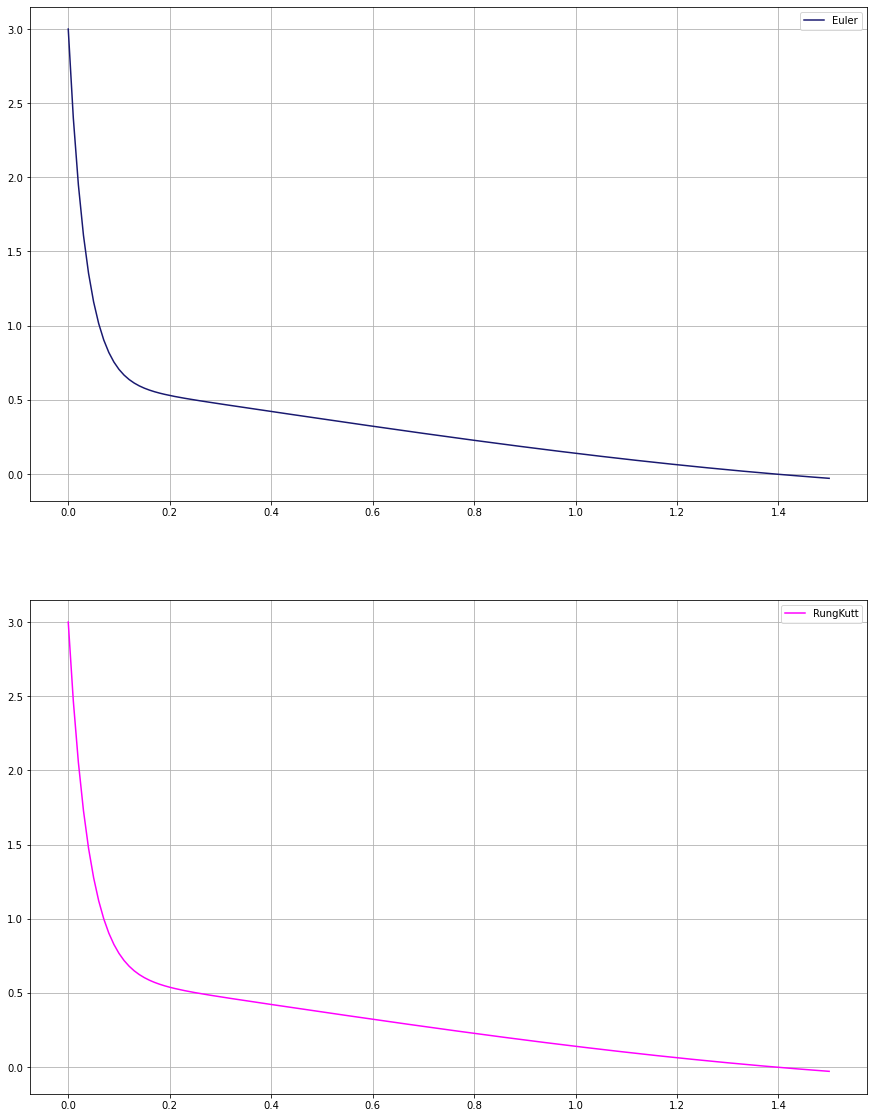

In [7]:
#строим графики
fig, axs = plt.subplots(2, 1, figsize = (15, 20))

#метод Эйлера
x1 = np.zeros(int((t1-t0)/h)+1)
for i in range(int((t1-t0)/h)+1):
    x1[i] = t0 + i*h
axs[0].plot(x1, yEuler, label = 'Euler', color = 'midnightblue')

#Рунг-Кутты
x2 = np.zeros(int((t1-t0)/h)+1)
for i in range(int((t1-t0)/h)+1):
    x2[i] = t0 + i*h
axs[1].plot(x2, yRung, label = 'RungKutt', color = 'fuchsia')

for i in range (2):
    axs[i].legend()
    axs[i].grid()

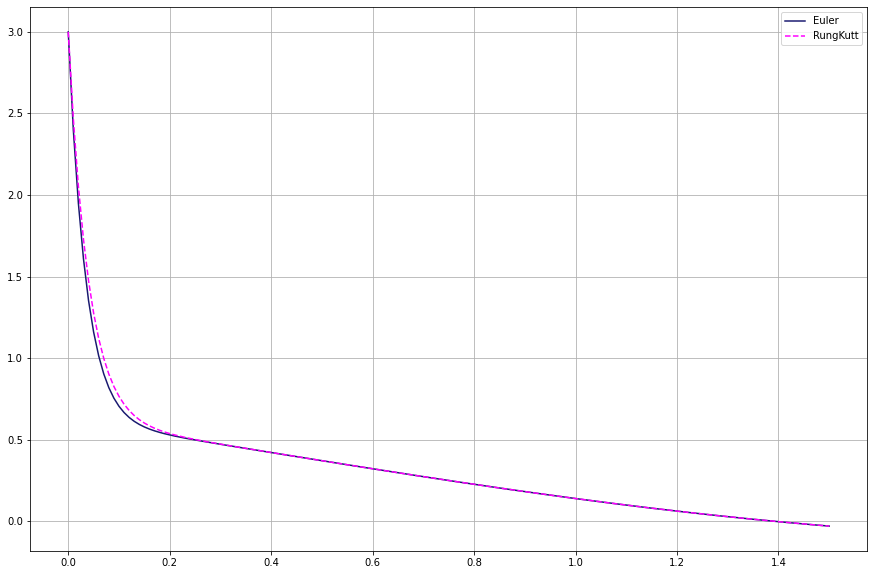

In [8]:
#для большей наглядности расположем графики в одной координатной плоскости
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
axs.plot(x1, yEuler, label = 'Euler', color = 'midnightblue')
axs.plot(x2, yRung, label = 'RungKutt', color = 'fuchsia', ls = 'dashed')
axs.legend()
axs.grid()

Невооруженным глазом видно, что методы получили похожие значения. Однако всё же метод Эйлера менее точный, так как имеет меньший порядок точности по сравнению с данной разновидностью метода Рунге-Кутты

3. Найти решение той же задачи с заданной точностью. Построить графики решения и сравнить с п.2.   

In [9]:
#введем погрешность
eps = 10**(-5)

In [10]:
#Вспомогательная функция для подсчёта значений на каждом шаге
def funcH(y, h, t):
    return(y + h * fRight(t, y))

#Метод Эйлера с заданым шагом
def Euler (h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        y[i] = funcH(y[i-1], h, t0 + h*(i-1))
    return y

def EulerEps (eps):
    h = 0.1
    err = [0.1]
    help1 = []
    help2 = []
    help1 = Euler(h)
    while( max(err) > eps ):
        err = np.zeros(round((t1-t0)/h)+1)
        h /= 2
        help2 = Euler(h)
        u = 0
        for i in range(len(help1)):
            err[i] = np.abs(help1[i]-help2[u])
            u += 2
        help1 = help2
    return help1, h

In [11]:
def K1(t, y):
    return fRight(t, y)

def K2(t, y, h, K1):
    return fRight(t + h/2, y + (h * K1)/2)

def K3(t, y, h, K1, K2):
    return fRight(t + h, y - h*K1 + 2*h*K2)

#вспомогательная функция для возвращения y_i+1
def funcH1 (y, h, K1, K2, K3):
    return y + (h/6)*(K1 + 4*K2 + K3)

#Метод Рунге-Кутты с заданным шагом
def RungKutt (h):
    n = round(((t1-t0)/h)+1)
    y = np.zeros(n)
    y[0] = y0
    for i in range(1, n):
        K1ex = K1(t0 + (i-1)*h, y[i-1])
        K2ex = K2(t0 + (i-1)*h, y[i-1], h, K1ex)
        K3ex = K3(t0 + (i-1)*h, y[i-1], h, K1ex, K2ex)
        y[i] = funcH1(y[i-1], h, K1ex, K2ex, K3ex)
    return y

#Оценка по рунге
def RungKuttEps (eps):
    h = 0.1
    err = [0.1]
    help1 = []
    help2 = []
    help1 = RungKutt(h)
    while( max(err) >= eps ):
        err = np.zeros(round((t1-t0)/h)+1)
        h /= 2
        help2 = RungKutt(h)
        u = 0
        for i in range(len(help1)):
            err[i] = np.abs(help1[i]-help2[u])
            u += 2
        help1 = help2
    return help1, h

In [12]:
#считаем значения
yEulerEps, hEuler= EulerEps(eps)
yRungKuttEps, hRung = RungKuttEps(eps)

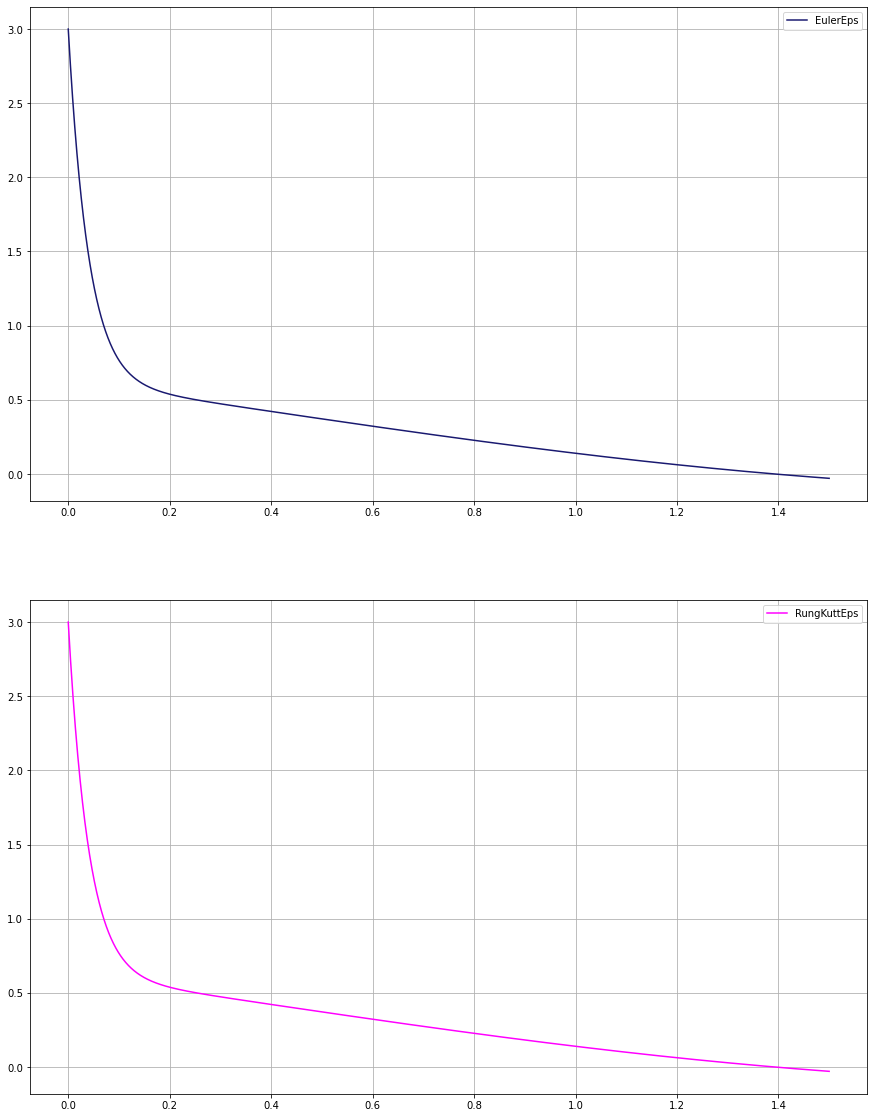

In [13]:
#строим графики
fig, axs = plt.subplots(2, 1, figsize = (15, 20))

#метод Эйлера
x11 = np.zeros(int((t1-t0)/hEuler)+1)
for i in range(int((t1-t0)/hEuler)+1):
    x11[i] = t0 + i*hEuler
axs[0].plot(x11, yEulerEps, label = 'EulerEps', color = 'midnightblue')

#Рунг-Кутты
x22 = np.zeros(int((t1-t0)/hRung)+1)
for i in range(int((t1-t0)/hRung)+1):
    x22[i] = t0 + i*hRung
axs[1].plot(x22, yRungKuttEps, label = 'RungKuttEps', color = 'fuchsia')

for i in range (2):
    axs[i].legend()
    axs[i].grid()

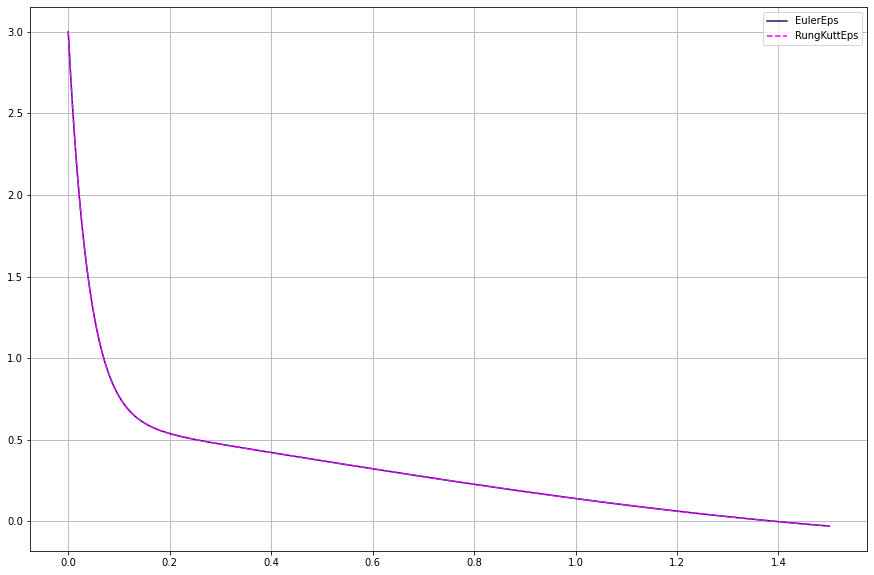

In [14]:
#для большей наглядности расположем графики в одной координатной плоскости
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
axs.plot(x11, yEulerEps, label = 'EulerEps', color = 'midnightblue')
axs.plot(x22, yRungKuttEps, label = 'RungKuttEps', color = 'fuchsia', ls = 'dashed')
axs.legend()
axs.grid()

Заметно, что отличия менее существенны, так как считали с заранее заданной точностью

Теперь поместим все четыре графика в одной плоскости, чтобы лучше оценить их поведение

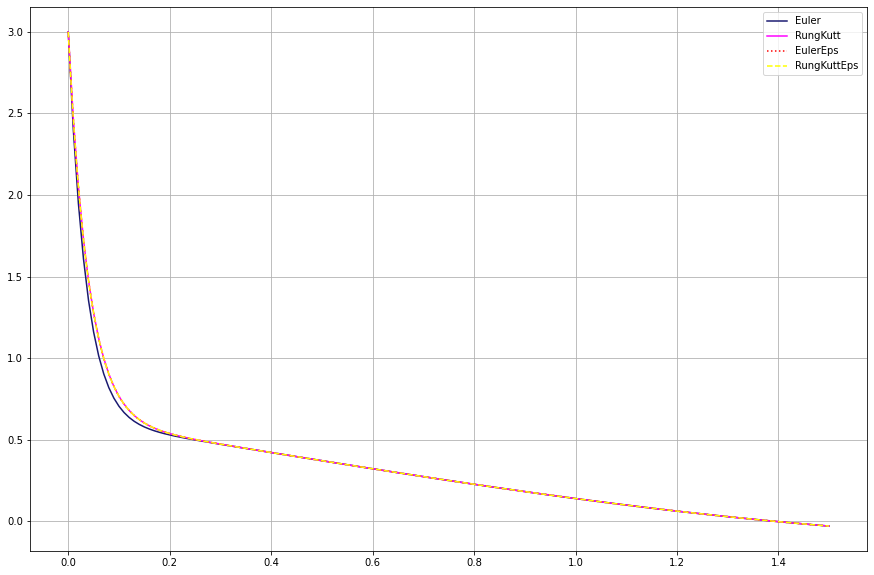

In [15]:
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
axs.plot(x1, yEuler, label = 'Euler', color = 'midnightblue')
axs.plot(x2, yRung, label = 'RungKutt', color = 'fuchsia')
axs.plot(x11, yEulerEps, label = 'EulerEps', color = 'red', ls = 'dotted')
axs.plot(x22, yRungKuttEps, label = 'RungKuttEps', color = 'yellow', ls = 'dashed')
axs.legend()
axs.grid()

(0.4, 1.0)

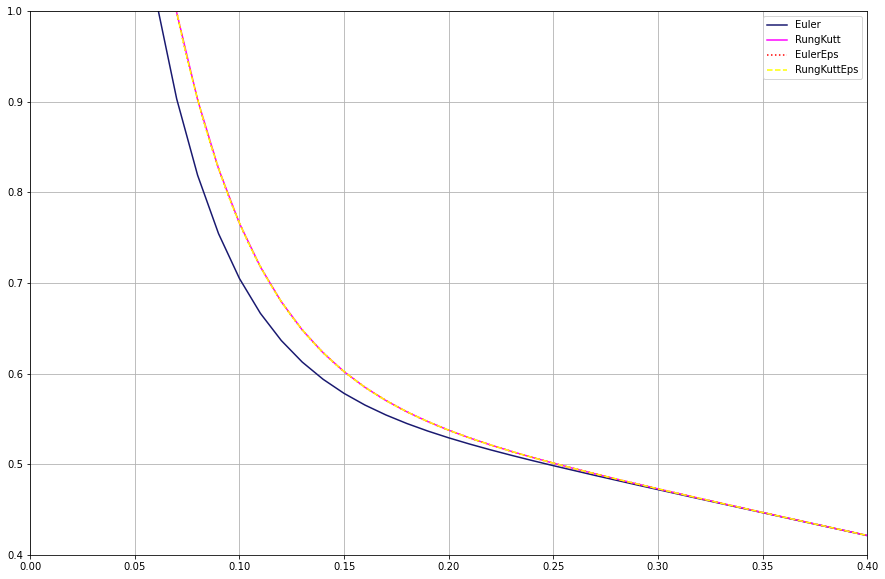

In [16]:
#для наглядности сделаю еще одно построение, но изменю масштаб
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
axs.plot(x1, yEuler, label = 'Euler', color = 'midnightblue')
axs.plot(x2, yRung, label = 'RungKutt', color = 'fuchsia')
axs.plot(x11, yEulerEps, label = 'EulerEps', color = 'red', ls = 'dotted')
axs.plot(x22, yRungKuttEps, label = 'RungKuttEps', color = 'yellow', ls = 'dashed')
axs.legend()
axs.grid()
axs.set_xlim(0, 0.4)
axs.set_ylim(0.4, 1)

По итогу получаем, что единственным сильно выделяющимся решением становится то, которое было получено методом Эйлера, который считал с постоянным шагом h = 0.01
Обе реализации метода Рунге-Кутты имеют больший порядок точности, поэтому отличаются, но вместе с ними также располагается решение по методу Эйлера с заданной погрешностью

# Задача 7.2.  Дана задача Коши для двух систем обыкновенных дифференциальных уравнений с постоянными коэффициентами 

$$ Y^I(t) = AY(t), Y(0) = Y_0 $$
$$ Z^I(t) = BZ(t), Z(0) = Z_0 $$

$$ Y_0 = \left( \begin{array}{c} 6.2 \\ 6.6 \\ 6.8 \end{array} \right) $$

$$ Z_0 = \left( \begin{array}{c} 5.2 \\ 5.6 \\ 6.4 \end{array} \right) $$

$$ A = \left( \begin{array}{ccc} -249.804 & 299.94 & 2.046 \\
-299.548 & -249.804 & -15.467 \\
-15.466 & 2.053 & -20.392   \end{array} \right )$$

$$ B = \left( \begin{array}{ccc} -119.801 & 1.013 & -29.999 \\
-4.967 & -100.197 & 298.481 \\
29.602 & -298.521 & -100.002   \end{array} \right )$$


In [17]:
#введём вышеуказанные матрицы
A = np.array([[-249.804, 299.94, 2.046], 
              [-299.548, -249.804, -15.467],
              [-15.466, 2.053, -20.392]])

B = np.array([[-119.801, 1.013, -29.999], 
              [-4.967, -100.197, 298.481],
              [29.602, -298.521, -100.002]])

y0 = np.array([6.2, 6.6, 6.8])

z0 = np.array([5.2, 5.6, 6.4])

1. Используя встроенную функцию для нахождения собственных чисел матриц A и B,  найти коэффициенты жесткости обеих систем. Установить какая  задача является жесткой.

In [18]:
#Найдём собственные числа обеих матриц
lambdaA = np.linalg.eigvals(A)
lambdaB = np.linalg.eigvals(B)

In [19]:
#Определим коэффициент жёсткости для каждой матрицы
sA = max(np.abs(lambdaA.real))/min(np.abs(lambdaA.real))
sB = max(np.abs(lambdaB.real))/min(np.abs(lambdaB.real))

print('Коэффициент жёсткости матрицы А:', sA)
print('Коэффициент жёсткости матрицы B:', sB)

Коэффициент жёсткости матрицы А: 12.500004558235045
Коэффициент жёсткости матрицы B: 1.2000060304247313


Система считается жёсткой, если S >> 1.
Предположим в нашем случае жёсткой является система А

2. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по явному методу Эйлера. 

In [20]:
def Euler(t1, t0, h, f, y0):
    n = int(((t1-t0)/h))
    y = [[0]*3 for i in range(n+1)]
    y[0] = y0
    for i in range (n):
        y[i+1] = y[i] + h*f(y[i])
    return y

def FA(y):
    return A @ y

def FB(z):
    return B @ z

3. Численно решить обе задачи  на отрезке [0,1] c шагом h=0.01 явным методом Эйлера. Определить, для какой из задач явный метод неустойчив при данном шаге h.

In [21]:
#Константы
t0 = 0
t1 = 1
h = 10**(-6)
n = int((t1-t0)/h)

In [22]:
#Ищем решения систем 
y = np.array(Euler(t1, t0, h, FA, y0))
z = np.array(Euler(t1, t0, h, FB, z0))

In [23]:
#для более удобной работы далее
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)

v1 = np.zeros(n)
v2 = np.zeros(n)
v3 = np.zeros(n)

for i in range (n):
    u1[i] = y[i][0]
    u2[i] = y[i][1]
    u3[i] = y[i][2]
    
    v1[i] = z[i][0]
    v2[i] = z[i][1]
    v3[i] = z[i][2]

Графики для матрицы А


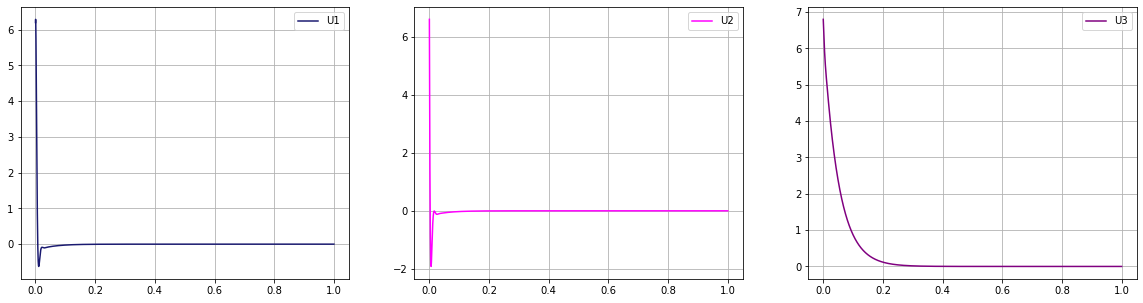

In [24]:
#графики для матрицы А
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
x = np.linspace(t0, t1, n)
axs[0].plot(x, u1, label = 'U1', color = 'midnightblue')
axs[1].plot(x, u2, label = 'U2', color = 'fuchsia')
axs[2].plot(x, u3, label = 'U3', color = 'purple')
for i in range (3):
    axs[i].legend()
    axs[i].grid()
    
print('Графики для матрицы А')

Графики для матрицы В


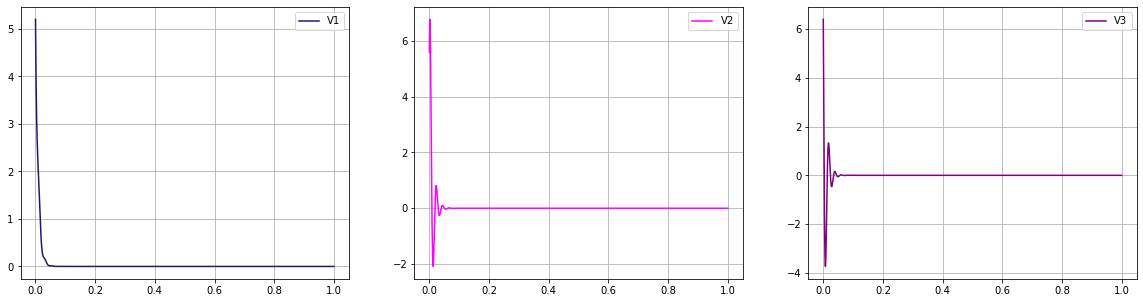

In [25]:
#графики для матрицы В
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
x = np.linspace(t0, t1, n)
axs[0].plot(x, v1, label = 'V1', color = 'midnightblue')
axs[1].plot(x, v2, label = 'V2', color = 'fuchsia')
axs[2].plot(x, v3, label = 'V3', color = 'purple')
for i in range (3):
    axs[i].legend()
    axs[i].grid()
    
print('Графики для матрицы В')

Ситуация получилась следующая: метод Эйлера даёт "гладкое" решение только для третьего уравнения первой системы. Значит метод устойчив в данном случае. В остальных ситуациях получаем скачки. При уменьшении шага h ничего нового больше не появляется, а начиная со значения h=10^(-9) программы "ломаются".

4. Составить программу-функцию нахождения решения системы ОДУ 1 порядка с постоянными коэффициентами по неявному методу Эйлера. Используя составленную программу, найти решение жесткой задачи с шагом h=0.01. Построить графики компонент полученного решения.

In [26]:
#неявный эйлер
def NEuler(t1, t0, h, f):
    n = int(((t1-t0)/h))
    y = [[0]*3 for i in range(n+1)]
    y[0] = y0
    for i in range (n):
        y[i+1] = y[i] + h*f(y[i])
        y[i+1] = y[i] + h*f(y[i+1])
    return y

In [27]:
#Ищем решения систем 
y = np.array(NEuler(t1, t0, h, FA))
z = np.array(NEuler(t1, t0, h, FB))

In [28]:
#для более удобной работы далее
u1 = np.zeros(n)
u2 = np.zeros(n)
u3 = np.zeros(n)

v1 = np.zeros(n)
v2 = np.zeros(n)
v3 = np.zeros(n)

for i in range (n):
    u1[i] = y[i][0]
    u2[i] = y[i][1]
    u3[i] = y[i][2]
    
    v1[i] = z[i][0]
    v2[i] = z[i][1]
    v3[i] = z[i][2]

Графики для матрицы А


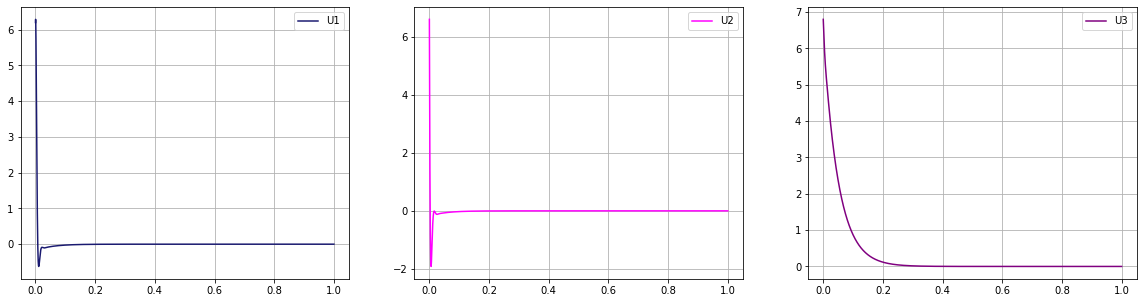

In [29]:
#графики для матрицы А
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
x = np.linspace(t0, t1, n)
axs[0].plot(x, u1, label = 'U1', color = 'midnightblue')
axs[1].plot(x, u2, label = 'U2', color = 'fuchsia')
axs[2].plot(x, u3, label = 'U3', color = 'purple')
for i in range (3):
    axs[i].legend()
    axs[i].grid()
    
print('Графики для матрицы А')

Графики для матрицы B


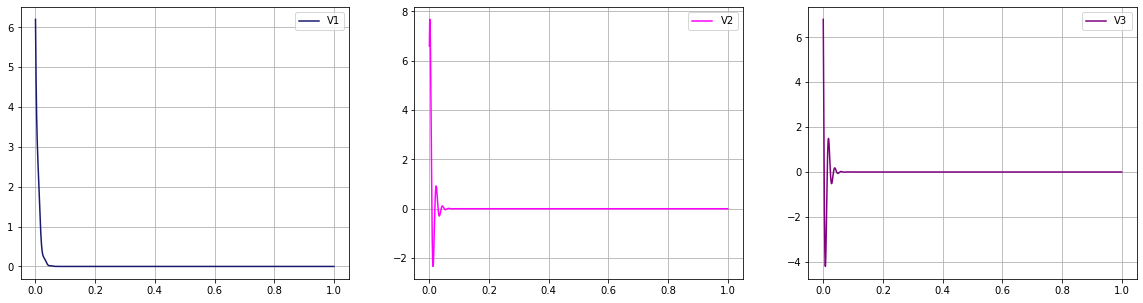

In [30]:
#графики для матрицы В
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
x = np.linspace(t0, t1, n)
axs[0].plot(x, v1, label = 'V1', color = 'midnightblue')
axs[1].plot(x, v2, label = 'V2', color = 'fuchsia')
axs[2].plot(x, v3, label = 'V3', color = 'purple')
for i in range (3):
    axs[i].legend()
    axs[i].grid()
    
print('Графики для матрицы B')

При использовании неявного метода Эйлера получили похожие по сути результаты для каждой матрицы. Метод также устойчив только для 3 уравнения 1 системы